Submitted by:-
Abdulaziz Mohammed Jawad Al-Khalifa - 219010767
Abdulraouf Hamad Al kulaib - 219038215

The solution to the code will be split into segments to dissect the solution and explain what we picked & why we picked it.

In this segment, we import the necessary libraries: pandas, matplotlib, and scikit-learn modules. We read the dataset from a CSV file called "Health_insurance.csv" into a pandas DataFrame called data.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder


data = pd.read_csv("Health_insurance.csv") 


This segment prints the first 10 rows and the last 10 rows of the dataset using the head() and tail() functions in pandas. It helps to get a quick overview of the dataset.

In [ ]:

print("First 10 rows:")
print(data.head(10))
print("\nLast 10 rows:")
print(data.tail(10))


Here, we use the describe() function to generate descriptive statistics of the dataset. It provides information like count, mean, standard deviation, minimum, maximum, and quartile values for numerical columns in the dataset.

In [ ]:

print("\nDataset description:")
print(data.describe())


In this segment, we check for null values in the dataset using the isnull() function and sum up the number of null values for each column using sum(). Then, we drop the rows containing null values using the dropna() function.

In [ ]:

print("\nNull values in the dataset:")
print(data.isnull().sum())
data = data.dropna()


In this segment, we group the data by 'sex' and 'smoker' columns and calculate the size of each group using groupby() and size(). Then, we reshape the data using unstack() to create a stacked bar plot. Finally, we customize the plot by adding labels to the x-axis, y-axis, and title, and display the plot using show().

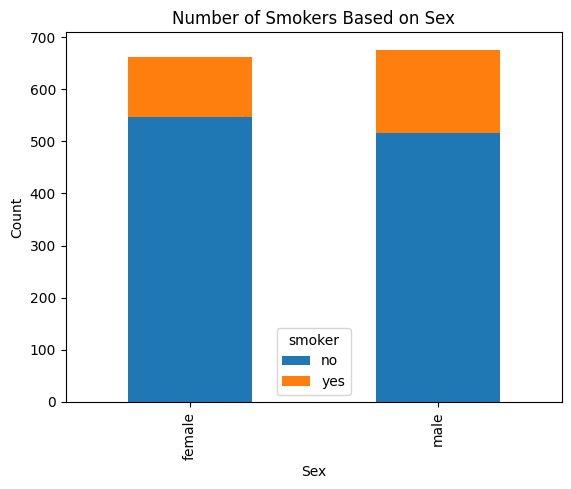

In [ ]:

smoker_sex = data.groupby(['sex', 'smoker']).size().unstack()
smoker_sex.plot(kind='bar', stacked=True)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Number of Smokers Based on Sex')
plt.show()


Here, we calculate the correlation between numeric values in the dataset using the corr() function. By specifying numeric_only=True, we exclude non-numeric columns from the correlation calculation. We then print the correlation matrix, which shows the pairwise correlation coefficients between different columns in the dataset.

In [ ]:

correlation_matrix = data.corr(numeric_only=True) 
print("\nCorrelation between values:")
print(correlation_matrix)


In this segment, we split the dataset into input features (X) and the target variable (y). We drop the 'charges' column from the input features and assign it to the variable X. Then, we assign the 'charges' column to the variable y.

Next, we perform one-hot encoding on the categorical variables in X using pd.get_dummies(), which converts categorical variables into binary columns. We assign the encoded features to the variable X_encoded.

Finally, we split the data into training and testing sets using train_test_split() from scikit-learn. The test set will be 20% of the data, and we set a random state of 42 for reproducibility.

In [ ]:

X = data.drop('charges', axis=1)
y = data['charges']


X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


Here, we create an instance of the LinearRegression model from scikit-learn and fit it to the training data using model.fit(X_train, y_train).we use the trained model to make predictions on the test set using model.predict(X_test). We store the predicted charges in the variable 'predictions' and then print them.

In [ ]:

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("\nPredicted charges:")
print(predictions)


In the final segment, we create a scatter plot to compare the actual charges (y_test) and the predicted charges (predictions). We use the scatter() function from Matplotlib to create two sets of points: one for the actual charges (blue) and another for the predicted charges (red). We add labels, a title, and a legend to the plot and display it using plt.show().

In [ ]:

plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Charges')
plt.scatter(range(len(predictions)), predictions, color='red', label='Predicted Charges')
plt.xlabel('Data Point')
plt.ylabel('Charges')
plt.title('Actual vs Predicted Charges')
plt.legend()
plt.show()
